# Homework 6

#### Sitong Ju
#### USC ID: 8791155953
#### email: sitongju@usc.edu

In [1]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

### 1(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
wdbc_data = '../data/wdbc.data'
wdbc = pd.read_csv(wdbc_data, header = None)
columns = ['ID', 'Diagnosis'] + ['feature'+str(i) for i in range(1,31)]
wdbc.columns = columns
wdbc.replace({'B' : 0, 'M' : 1}, inplace=True)
wdbc

,ID,Diagnosis,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
def process_data(data, random_state, test_size=0.2):
    np.random.seed(random_state)
    
    #20% from benign samples
    benign, = np.where(data['Diagnosis'] == 0)
    benign_test_num = round(len(benign) * test_size)
    benign_test = np.random.choice(benign, benign_test_num, replace=False)
    
    #20% from malignant samples
    malignant, = np.where(data['Diagnosis'] == 1)
    malignant_test_num = round(len(malignant) * test_size)
    malignant_test = np.random.choice(malignant, malignant_test_num, replace=False)
    
    test_set = np.concatenate([benign_test, malignant_test])
    train_set = np.array([i for i in range(data.shape[0]) if i not in test_set])
    
    trainX = data.iloc[train_set, 2:].copy()
    trainY = data.iloc[train_set, 1].copy()
    testX = data.iloc[test_set, 2:].copy()
    testY = data.iloc[test_set, 1].copy()
    
    return trainX, trainY, testX, testY

In [4]:
trainX, trainY, testX, testY = process_data(wdbc, random_state=0)

In [5]:
trainX

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [6]:
trainY

0      1
3      1
4      1
5      1
6      1
      ..
563    1
564    1
565    1
566    1
568    0
Name: Diagnosis, Length: 456, dtype: int64

In [7]:
testX

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,15.15,31.82,99.00,698.8,0.1162,0.17110,0.228200,0.128200,0.2871,0.06917
285,12.580,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,...,13.50,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431
495,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.049510,0.1487,0.05748,...,16.01,28.48,103.90,783.6,0.1216,0.13880,0.170000,0.101700,0.2369,0.06599
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.000000,0.1985,0.07098,...,10.17,22.80,64.01,317.0,0.1460,0.13100,0.000000,0.000000,0.2445,0.08865
187,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.032390,0.1516,0.06095,...,13.01,21.39,84.42,521.5,0.1323,0.10400,0.152100,0.109900,0.2572,0.07097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,18.490,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.091830,0.1832,0.06697,...,22.75,22.88,146.40,1600.0,0.1412,0.30890,0.353300,0.166300,0.2510,0.09445
352,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,0.1956,0.06121,...,33.13,23.58,229.30,3234.0,0.1530,0.59370,0.645100,0.275600,0.3690,0.08815
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.149600,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.1491,0.75840,0.678000,0.290300,0.4098,0.12840
91,15.370,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.074830,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.19970,0.284600,0.147600,0.2556,0.06828


In [8]:
testY

49     0
285    0
495    0
391    0
187    0
      ..
498    1
352    1
181    1
91     1
11     1
Name: Diagnosis, Length: 113, dtype: int64

### 1(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly se- lected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

### 1(b)i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [9]:
from sklearn.preprocessing import Normalizer

def normalize_data(trainX, testX):
    scaler = Normalizer()
    norm_trainX = scaler.fit_transform(trainX)
    norm_testX = scaler.transform(testX)
    return norm_trainX, norm_testX

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc

def eval_metrics(ground_truth, predict, prob, report):
    #print out the model stats report
    
    acc = report['accuracy']
    fpr, tpr, thresholds = roc_curve(ground_truth, prob, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 4)
    return {
        'acc' : acc,
        'precision' : report['weighted avg']['precision'],
        'recall' : report['weighted avg']['recall'],
        'f1-score' : report['weighted avg']['f1-score'],
        'auc' : roc_auc
    }

def model_summary(ground_truth, predict, prob, report, title): 
    #print out the summary and graphs
    
    conf_mat = confusion_matrix(ground_truth, predict)
    print("The confusion for {} set is \n{}".format(title, conf_mat))
    print("The classification accuracy is %0.4f" % report['accuracy'])
    fpr, tpr, thresholds = roc_curve(ground_truth, prob, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 4)
    
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    axes.set_title("ROC curves of {}".format(title))
    plt.show()

In [11]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

params = {'C' : np.logspace(-2, 7, 20)}
    
settings = {
    'param_grid' : params, 
    'scoring' : 'f1_weighted',
    'n_jobs' : -1,
    'verbose' : 0
}
    
train_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
test_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    
for i in range(30):
    trainX, trainY, testX, testY = process_data(wdbc, random_state=i)
    trainX, testX = normalize_data(trainX, testX)
        
    settings['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        
    # build and fit the grid search for given classifier
    clf = GridSearchCV(estimator = LinearSVC(penalty='l1', dual=False), **settings)
    clf.fit(trainX, trainY)
        
    # training
    trainPredY_prob = clf.decision_function(trainX)
    trainPredY = clf.predict(trainX)
    trainReport = classification_report(trainY, trainPredY, output_dict=True)
    tmp_train_res = eval_metrics(trainY, trainPredY, trainPredY_prob, trainReport)
    train_resdf = train_resdf.append(tmp_train_res, ignore_index=True)
        
    # test
    testPredY_prob = clf.decision_function(testX)
    testPredY = clf.predict(testX)
    testReport = classification_report(testY, testPredY, output_dict=True)
    tmp_test_res = eval_metrics(testY, testPredY, testPredY_prob, testReport)
    test_resdf = test_resdf.append(tmp_test_res, ignore_index=True)
        
    print("Simulaton {}: Train acc: {:.4f}, Test acc: {:.4f}".format(i+1, trainReport['accuracy'],testReport['accuracy']))
    print("The best parameter setting is:")
    print(clf.best_params_, "\n")


Simulaton 1: Train acc: 0.9956, Test acc: 0.9646
The best parameter setting is:
{'C': 127427.49857031321} 

Simulaton 2: Train acc: 0.9759, Test acc: 0.9558
The best parameter setting is:
{'C': 1623.776739188721} 

Simulaton 3: Train acc: 0.9759, Test acc: 0.9204
The best parameter setting is:
{'C': 1623.776739188721} 

Simulaton 4: Train acc: 0.9890, Test acc: 0.9646
The best parameter setting is:
{'C': 14384.498882876629} 

Simulaton 5: Train acc: 0.9978, Test acc: 0.9558
The best parameter setting is:
{'C': 42813.32398719387} 

Simulaton 6: Train acc: 0.9868, Test acc: 0.9469
The best parameter setting is:
{'C': 14384.498882876629} 

Simulaton 7: Train acc: 0.9781, Test acc: 0.9646
The best parameter setting is:
{'C': 14384.498882876629} 

Simulaton 8: Train acc: 0.9846, Test acc: 0.9558
The best parameter setting is:
{'C': 42813.32398719387} 

Simulaton 9: Train acc: 0.9912, Test acc: 0.9735
The best parameter setting is:
{'C': 3359818.2862837743} 

Simulaton 10: Train acc: 0.9737,

Detail report of the 30th run of Monte-Calo

The confusion for training set is 
[[284   2]
 [  4 166]]
The classification accuracy is 0.9868


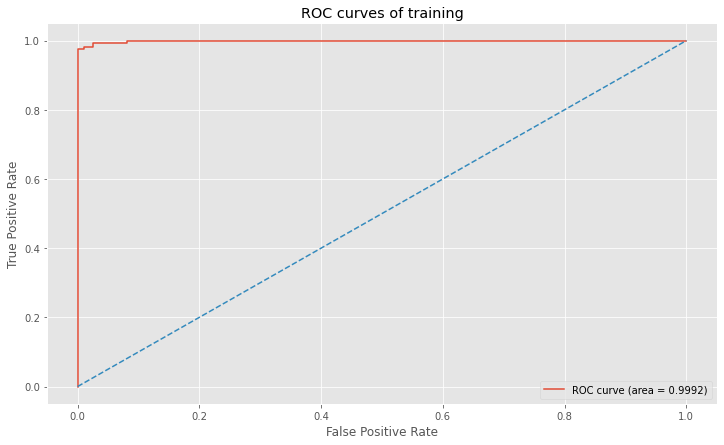

The confusion for test set is 
[[69  2]
 [ 4 38]]
The classification accuracy is 0.9469


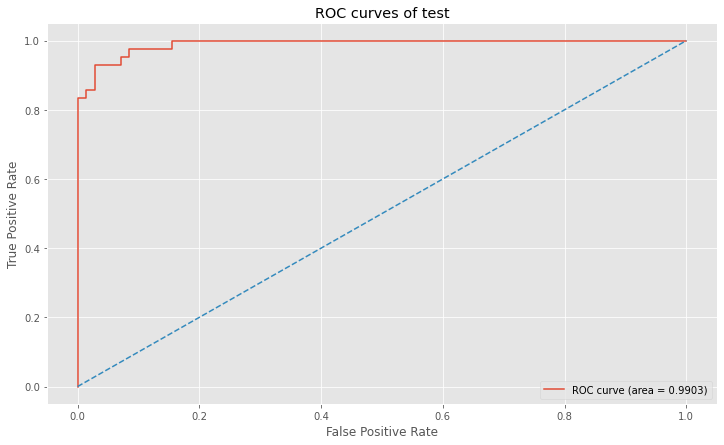


Supervised Learning metrics
            acc  precision    recall  f1-score       auc
train  0.983699   0.983734  0.983699  0.983676  0.998643
test   0.960472   0.960902  0.960472  0.960373  0.988500


In [12]:
print('Detail report of the 30th run of Monte-Calo\n')
    
# training
model_summary(trainY, trainPredY, trainPredY_prob, trainReport, 'training')
# test
model_summary(testY, testPredY, testPredY_prob, testReport, 'test')
    
train_resdf = train_resdf.apply(lambda x: x.mean(), axis=0)
test_resdf = test_resdf.apply(lambda x: x.mean(), axis=0)
print('\nSupervised Learning metrics')
summary = pd.concat([train_resdf, test_resdf], axis=1)
summary = summary.T
summary = summary.set_index(pd.Series(['train', 'test']))
print(summary)

### 1(b)ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

In [13]:
def SemiSupervised_SVM(trainX, trainY, settings):
    labeled_idx = []
    
    for c in [0, 1]:
        c_idx, = np.where(trainY == c)
        idx_num = round(len(c_idx) * 0.5)
        select_idx = np.random.choice(c_idx, idx_num, replace=False)
        labeled_idx.extend(select_idx)
    
    unlabeled_idx = [i for i in range(len(trainX)) if i not in labeled_idx]
    
    labeledX = trainX[labeled_idx].tolist()
    labeledY = trainY.iloc[labeled_idx].tolist()
    
    unlabeledX = trainX[unlabeled_idx].tolist()
    unlabeledY = trainY.iloc[unlabeled_idx].to_numpy().tolist()
    
    # find the best parameter with given 50% data
    clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
    clf.fit(labeledX, labeledY)
    
    while len(unlabeledX) > 0:
        # calculate distance from unlabeled data points to decision boundary
        scores = clf.decision_function(unlabeledX)
        # sort by the absolute value of score
        sorted_idx = sorted([i for i in range(len(unlabeledX))], 
                            key=lambda x : abs(scores[x]),reverse = True)
        selected_idx = sorted_idx[0]
        svm_labeled_y = clf.predict(np.array(unlabeledX[selected_idx]).reshape(1, -1))
        
        # remove the farthest point from unlabeled and add the svm-predicted label to labeled
        labeledX.append(unlabeledX.pop(selected_idx))
        unlabeledY.pop(selected_idx)
        labeledY.append(svm_labeled_y[0]) #add an element not array
        
        # refit the SVC
        clf.best_estimator_.fit(labeledX, labeledY)
    return clf

In [14]:
tuned_params = {'C' : np.logspace(-2, 7, 10)}
    
# some general settings of grid search
settings = {
        'param_grid' : tuned_params, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
}
    
train_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
test_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])

# 30 times Monte-Carlo Simulation
for i in range(30):
    trainX, trainY, testX, testY = process_data(wdbc, random_state=i)
    trainX, testX = normalize_data(trainX, testX)

    #5-fold cross-validation
    settings['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
    clf = SemiSupervised_SVM(trainX, trainY, settings)

    # train
    trainPredY_prob = clf.decision_function(trainX)
    trainPredY = clf.predict(trainX)
    trainReport = classification_report(trainY, trainPredY, output_dict=True)
    tmp_train_res = eval_metrics(trainY, trainPredY, trainPredY_prob, trainReport)
    train_resdf = train_resdf.append(tmp_train_res, ignore_index=True)
        
    # test
    testPredY_prob = clf.decision_function(testX)
    testPredY = clf.predict(testX)
    testReport = classification_report(testY, testPredY, output_dict=True)
    tmp_test_res = eval_metrics(testY, testPredY, testPredY_prob, testReport)
    test_resdf = test_resdf.append(tmp_test_res, ignore_index=True)

    # output the best option
    print("Simulation {}: Train accuracy : {:.4f}, Test accuracy : {:.4f}".format(i+1, trainReport['accuracy'],
                                                                            testReport['accuracy']))
    print("The best parameter setting is:")
    print(clf.best_params_, "\n")

Simulation 1: Train accuracy : 0.9846, Test accuracy : 0.9558
The best parameter setting is:
{'C': 10000.0} 

Simulation 2: Train accuracy : 0.9649, Test accuracy : 0.9646
The best parameter setting is:
{'C': 1000.0} 

Simulation 3: Train accuracy : 0.9715, Test accuracy : 0.9292
The best parameter setting is:
{'C': 10000.0} 

Simulation 4: Train accuracy : 0.9803, Test accuracy : 0.9469
The best parameter setting is:
{'C': 10000.0} 

Simulation 5: Train accuracy : 0.9737, Test accuracy : 0.9204
The best parameter setting is:
{'C': 10000.0} 

Simulation 6: Train accuracy : 0.9715, Test accuracy : 0.9292
The best parameter setting is:
{'C': 10000.0} 

Simulation 7: Train accuracy : 0.9583, Test accuracy : 0.9558
The best parameter setting is:
{'C': 10000.0} 

Simulation 8: Train accuracy : 0.9759, Test accuracy : 0.9381
The best parameter setting is:
{'C': 100000.0} 

Simulation 9: Train accuracy : 0.9846, Test accuracy : 0.9558
The best parameter setting is:
{'C': 10000.0} 

Simulation

The confusion for training set is 
[[283   3]
 [  6 164]]
The classification accuracy is 0.9803


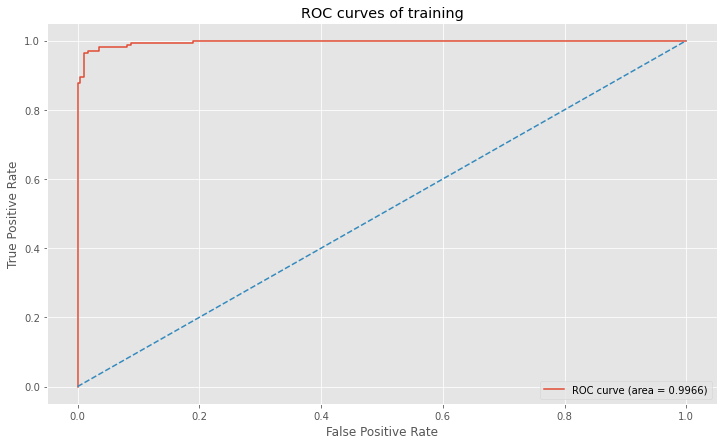

The confusion for test set is 
[[69  2]
 [ 8 34]]
The classification accuracy is 0.9115


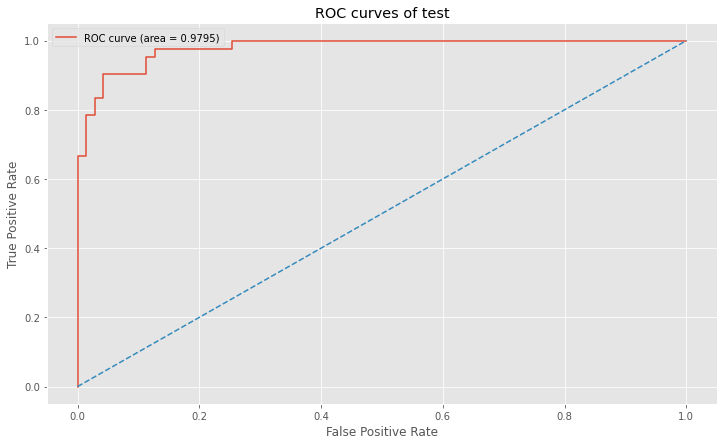


Semi-Supervised Learning metrics
               acc  precision    recall  f1-score      auc
training  0.972076   0.972335  0.972076  0.972040  0.99382
test      0.951327   0.952322  0.951327  0.951106  0.98447


In [15]:
model_summary(trainY, trainPredY, trainPredY_prob, trainReport, 'training')
model_summary(testY, testPredY, testPredY_prob, testReport, 'test')
    
# average metrics
train_resdf = train_resdf.apply(lambda x: x.mean(), axis=0)
test_resdf = test_resdf.apply(lambda x: x.mean(), axis=0)
print('\nSemi-Supervised Learning metrics')
summary = pd.concat([train_resdf, test_resdf], axis=1)
summary = summary.T
summary = summary.set_index(pd.Series(['training', 'test']))
print(summary)

### 1(b)iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

In [16]:
from scipy.special import softmax

def get_distance(centers, X, cluster_label):
    dist = np.ndarray((X.shape[0],))
    proba = np.ndarray((X.shape[0], 2))
    for i, x in enumerate(X):
        center = centers[cluster_label[i]]
        dist[i] = np.linalg.norm(x - center)
        proba[i, 0] = np.linalg.norm(x - centers[0])
        proba[i, 1] = np.linalg.norm(x - centers[1])
    
    proba = softmax(proba, axis=1).astype(np.float64)
    return dist, proba

def get_majority(X, cluster_label, dist, Y):
    
    label2cluster = np.ndarray((2,), dtype='int')
    major_label = cluster_label.copy()
    for label in [0, 1]:
        sample_idx, = np.where(cluster_label == label)
        top30 = sorted(sample_idx.tolist(), key=lambda i : dist[i])[:30]
        majority = Y.iloc[top30].value_counts().index[0]
        major_label[sample_idx] = majority
        label2cluster[majority] = label
    return label2cluster, major_label

In [17]:
from sklearn.cluster import KMeans

train_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
test_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
for i in range(30):
        
    trainX, trainY, testX, testY = process_data(wdbc, random_state=i, test_size=0.2) 
    trainX, testX = normalize_data(trainX, testX)   
    clusterer = KMeans(n_clusters=2, n_init = 15, random_state=i).fit(trainX)
        
    # training
    train_cluster_label = clusterer.predict(trainX)
    dist, trainPredY_prob = get_distance(clusterer.cluster_centers_, trainX, train_cluster_label)
    label2cluster, trainPredY = get_majority(trainX, train_cluster_label, dist, trainY)

    pos_cluster = label2cluster[0]
    trainPredY_prob = trainPredY_prob[:, pos_cluster]
    trainReport = classification_report(trainY, trainPredY, output_dict=True)
    tmp_train_res = eval_metrics(trainY, trainPredY, trainPredY_prob, trainReport)
    train_resdf = train_resdf.append(tmp_train_res, ignore_index=True)
        
    # test
    test_cluster_label = clusterer.predict(testX)
    dist, testPredY_prob = get_distance(clusterer.cluster_centers_, testX, test_cluster_label)
    label2cluster, testPredY = get_majority(testX, test_cluster_label, dist, testY)
    pos_cluster = label2cluster[0]
    testPredY_prob = testPredY_prob[:, pos_cluster]
    testReport = classification_report(testY, testPredY, output_dict=True)
    tmp_test_res = eval_metrics(testY, testPredY, testPredY_prob, testReport)
    test_resdf = test_resdf.append(tmp_test_res, ignore_index=True)
        
    # log information
    print("Simulation {}: Train acc : {:.4f}, Test acc : {:.4f}".format(i+1, trainReport['accuracy'],
                                                                            testReport['accuracy']))


Simulation 1: Train acc : 0.8882, Test acc : 0.8761
Simulation 2: Train acc : 0.8706, Test acc : 0.9558
Simulation 3: Train acc : 0.8969, Test acc : 0.8496
Simulation 4: Train acc : 0.8860, Test acc : 0.9115
Simulation 5: Train acc : 0.8991, Test acc : 0.8761
Simulation 6: Train acc : 0.8860, Test acc : 0.8673
Simulation 7: Train acc : 0.8794, Test acc : 0.8938
Simulation 8: Train acc : 0.8860, Test acc : 0.8673
Simulation 9: Train acc : 0.8882, Test acc : 0.8584
Simulation 10: Train acc : 0.8794, Test acc : 0.8938
Simulation 11: Train acc : 0.8925, Test acc : 0.8761
Simulation 12: Train acc : 0.8794, Test acc : 0.9115
Simulation 13: Train acc : 0.8816, Test acc : 0.9027
Simulation 14: Train acc : 0.8882, Test acc : 0.8938
Simulation 15: Train acc : 0.8969, Test acc : 0.8496
Simulation 16: Train acc : 0.8772, Test acc : 0.9027
Simulation 17: Train acc : 0.9013, Test acc : 0.8319
Simulation 18: Train acc : 0.8838, Test acc : 0.9115
Simulation 19: Train acc : 0.8860, Test acc : 0.8850
Si

The confusion for training set is 
[[282   4]
 [ 45 125]]
The classification accuracy is 0.8925


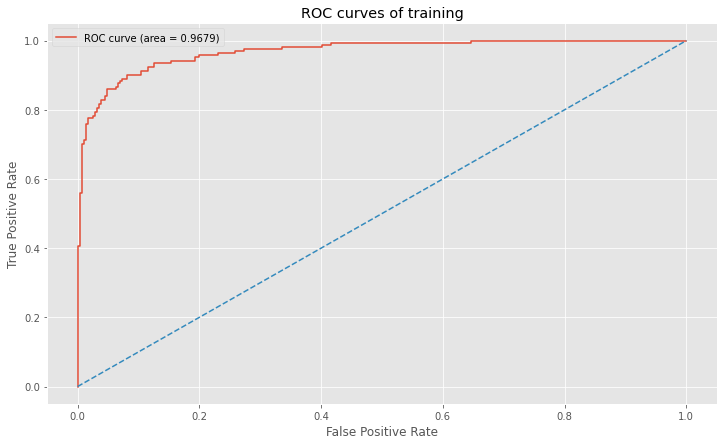

The confusion for test set is 
[[70  1]
 [17 25]]
The classification accuracy is 0.8407


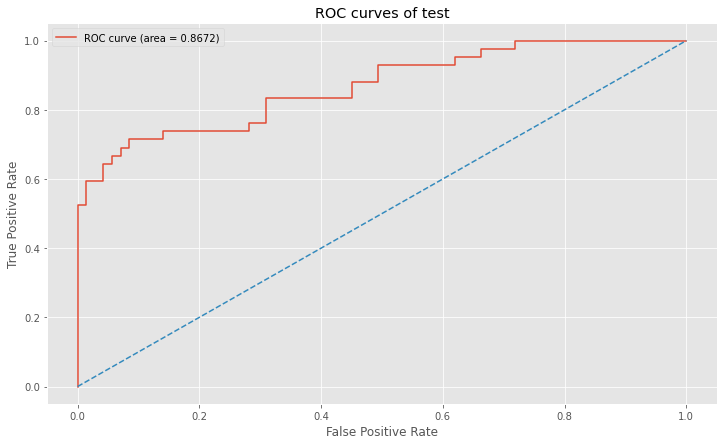


Unsupervised Learning metrics
               acc  precision    recall  f1-score       auc
training  0.887792   0.896542  0.887792  0.883912  0.950717
test      0.882301   0.894138  0.882301  0.877143  0.945860


In [18]:
# training
model_summary(trainY, trainPredY, trainPredY_prob, trainReport, 'training')
# test
model_summary(testY, testPredY, testPredY_prob, testReport, 'test')
    
# average metrics
train_resdf = train_resdf.apply(lambda x: x.mean(), axis=0)
test_resdf = test_resdf.apply(lambda x: x.mean(), axis=0)
print('\nUnsupervised Learning metrics')
summary = pd.concat([train_resdf, test_resdf], axis=1)
summary = summary.T
summary = summary.set_index(pd.Series(['training', 'test']))
print(summary)

### 1(b)iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus- tering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [19]:
train_resdf = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc'])
test_resdf = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc'])

In [30]:
from statistics import mode
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score,confusion_matrix

# 30 times Monte-Carlo simulations
for i in range(30):
    trainX, trainY, testX, testY = process_data(wdbc, random_state=i)
    trainX, testX = normalize_data(trainX, testX)
    spec_clust = SpectralClustering(affinity = 'rbf',
                                gamma = 1,
                                n_clusters=2,
                                n_init=100,
                                random_state=i)
    cluster_label_train = spec_clust.fit_predict(trainX)

    #majority polling by entire points in the train clusters
    indices_0 = np.where(cluster_label_train==0)
    indices_0_num = len(indices_0[0])
    indices_1 = np.where(cluster_label_train==1)
    indices_1_num = len(indices_1[0])
    mode_0 = mode(trainY.iloc[indices_0])
    indices_0_class_0 = len(trainY.iloc[indices_0][trainY==0])
    mode_1 = mode(trainY.iloc[indices_1])
    indices_1_class_0 = len(trainY.iloc[indices_1][trainY==0])
    cluster_label_train = np.where(cluster_label_train==0, mode_0, mode_1)
    
    #generate probability
    trainY = trainY.to_frame()
    trainY.loc[trainY.iloc[indices_0].index,'prob'] = trainY.apply(lambda x: 1-indices_0_class_0/indices_0_num,axis=1)
    trainY.loc[trainY.iloc[indices_1].index,'prob'] = trainY.apply(lambda x: 1-indices_1_class_0/indices_1_num,axis=1)
    trainPredY_prob = trainY['prob']
    trainY = trainY['Diagnosis']
    
    #use a KNN for prediction for test data
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(trainX, cluster_label_train)
    
    # predict and evaluate the model
    trainPredY = cluster_label_train
    acc_train = accuracy_score(trainY, trainPredY)
    precision = precision_score(trainY, trainPredY, pos_label=1)
    recall = recall_score(trainY, trainPredY, pos_label=1)
    f1score = f1_score(trainY, trainPredY, pos_label=1, average='weighted')
    auc_train = roc_auc_score(trainY, trainPredY_prob)
    tmp_train_result = {
        'accuracy' : acc_train,
        'precision' : precision,
        'recall' : recall,
        'f1-score' : f1score,
        'auc' : auc_train}
    train_resdf = train_resdf.append(tmp_train_result, ignore_index=True)

    
    testPredY = knn.predict(testX)
    testPredY_prob = knn.predict_proba(testX)[:,[1]]
    acc_test = accuracy_score(testY, testPredY)
    precision = precision_score(testY, testPredY, pos_label=1)
    recall = recall_score(testY, testPredY, pos_label=1)
    f1score = f1_score(testY, testPredY, pos_label=1, average='weighted')
    auc_test = roc_auc_score(testY, testPredY_prob)
    tmp_test_result = {
        'accuracy' : acc_test,
        'precision' : precision,
        'recall' : recall,
        'f1-score' : f1score,
        'auc' : auc_test}
    test_resdf = test_resdf.append(tmp_test_result, ignore_index=True)

    # output the best option
    print("Simulation {}: Train accuracy : {:.4f}, Test accuracy : {:.4f}".format(i+1, acc_train,acc_test))

Simulation 1: Train accuracy : 0.8860, Test accuracy : 0.8850
Simulation 2: Train accuracy : 0.8684, Test accuracy : 0.9204
Simulation 3: Train accuracy : 0.8925, Test accuracy : 0.8407
Simulation 4: Train accuracy : 0.8794, Test accuracy : 0.8761
Simulation 5: Train accuracy : 0.8838, Test accuracy : 0.8761
Simulation 6: Train accuracy : 0.8838, Test accuracy : 0.8761
Simulation 7: Train accuracy : 0.8728, Test accuracy : 0.8938
Simulation 8: Train accuracy : 0.8838, Test accuracy : 0.8496
Simulation 9: Train accuracy : 0.8860, Test accuracy : 0.8496
Simulation 10: Train accuracy : 0.8772, Test accuracy : 0.8761
Simulation 11: Train accuracy : 0.8904, Test accuracy : 0.8496
Simulation 12: Train accuracy : 0.8794, Test accuracy : 0.8938
Simulation 13: Train accuracy : 0.8794, Test accuracy : 0.8938
Simulation 14: Train accuracy : 0.8794, Test accuracy : 0.8850
Simulation 15: Train accuracy : 0.8925, Test accuracy : 0.8053
Simulation 16: Train accuracy : 0.8728, Test accuracy : 0.8850
S

The confusion for train set is 
[[282   4]
 [ 45 125]]


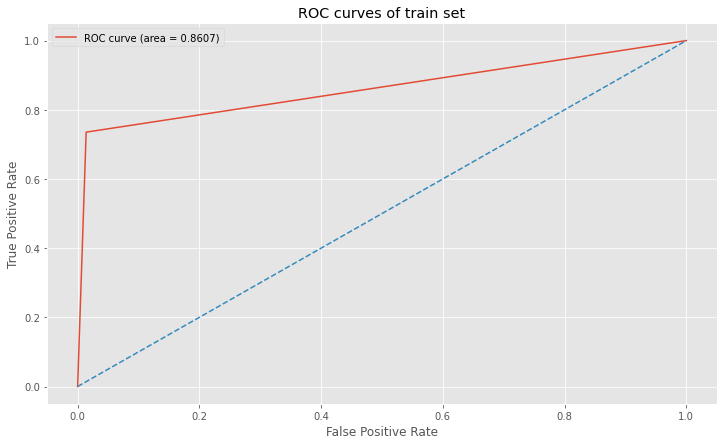

In [31]:
conf_mat = confusion_matrix(trainY, trainPredY)
print("The confusion for train set is \n{}".format(conf_mat))
fpr, tpr, thresholds = roc_curve(trainY, trainPredY_prob, pos_label=1)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % auc_train)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of train set")
plt.show()

The confusion for test set is 
[[69  2]
 [18 24]]


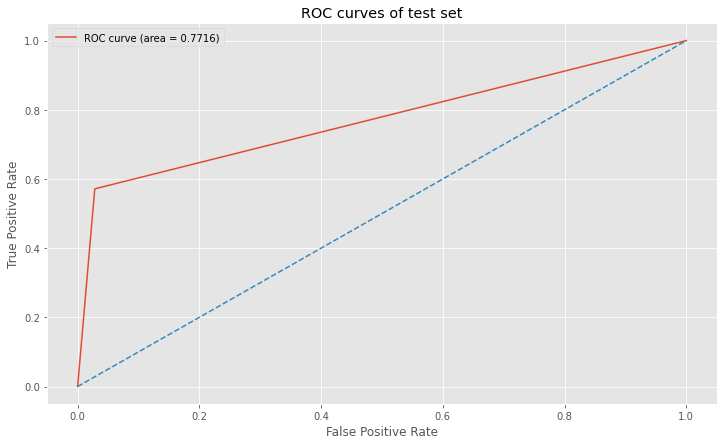

In [32]:
conf_mat = confusion_matrix(testY, testPredY)
print("The confusion for test set is \n{}".format(conf_mat))
fpr, tpr, thresholds = roc_curve(testY, testPredY_prob, pos_label=1)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % auc_test)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of test set")
plt.show()

In [33]:
train_resdf = train_resdf.apply(lambda x: x.mean(), axis=0)
test_resdf = test_resdf.apply(lambda x: x.mean(), axis=0)
print('\nSummary of average metrics')
print('-' * 80)
summary = pd.concat([train_resdf, test_resdf], axis=1)
summary = summary.T
summary = summary.set_index(pd.Series(['training', 'test']))
print(summary)


Summary of average metrics
--------------------------------------------------------------------------------
          accuracy  precision    recall  f1-score       auc
training  0.882968   0.959602  0.716275  0.878544  0.849163
test      0.871681   0.958485  0.684921  0.865377  0.833540


### b(v) Based the results above, the performance of the four strategies : supervised > semi-simpervised > unsupervised, which is what we expected. The performance of supervised learning on the full data set is similar to the semi-supervised learning with half of the data set labeled. The former strategy suppose to perform better than the later one. The situation could happen by chance because the number of Monte-Carlo Simulations for each classifiers is relatively small. The gap between supervised and semi-supaervised is sinificantly smaller than that between (semi-)supervised cases and unsupervised cases. Those supervised case will have more information of labels to guide their learning while the prediction of unsupervised ones is just based on the similarity of features.

# 2. Active Learning Using Support Vector Machines

### 2(a) Download the banknote authentication Data Set

In [34]:
banknote = pd.read_csv('../data/data_banknote_authentication.txt', header = None)
banknote.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [35]:
test_num = np.random.choice(banknote.shape[0], 472, replace=False)
train_num = np.array([i for i in range(banknote.shape[0]) if i not in test_num])
banknote_train = banknote.iloc[train_num]
banknote_test = banknote.iloc[test_num]
banknote_train

,variance,skewness,curtosis,entropy,class
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
5,4.36840,9.67180,-3.9606,-3.16250,0
7,2.09220,-6.81000,8.4636,-0.60216,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [36]:
banknote_test

,variance,skewness,curtosis,entropy,class
989,-6.75260,8.81720,-0.061983,-3.72500,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
1036,-2.38980,-0.78427,3.014100,0.76205,1
268,0.92970,-3.79710,4.642900,-0.29570,0
1106,-0.12690,-1.15050,-0.951380,0.57843,1
...,...,...,...,...,...
1360,-0.24745,1.93680,-2.469700,-0.80518,1
274,5.27560,0.13863,0.121380,1.14350,0
509,-0.29510,9.04890,-0.527250,-2.07890,0
930,-2.22140,-0.23798,0.560080,0.05602,1


### 2(b) Repeat each of the following two procedures 50 times.

### 2(b)i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [37]:
tuned_params = {'C' : np.logspace(-2, 7, 20)}
    
settings = {
    'param_grid' : tuned_params, 
    'scoring' : 'f1_weighted',
    'n_jobs' : -1,
    'verbose' : 0
}
    
learning_curve = []
    
for i in range(50):
        
    test_num = np.random.choice(banknote.shape[0], 472, replace=False)
    train_num = np.array([i for i in range(banknote.shape[0]) if i not in test_num])
        
    train_set, test_set = banknote.iloc[train_num], banknote.iloc[test_num]
    trainX, trainY = train_set.iloc[:, :-1], train_set.iloc[:, -1]
    testX, testY = test_set.iloc[:, :-1], test_set.iloc[:, -1]
        
    trainX, testX = normalize_data(trainX, testX)
    settings['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        
    #acc_list = passiveLearning(trainX, trainY, testX, testY, settings)
    
    touse_num = np.arange(trainX.shape[0])
    used_num = []
    acc_list = []
    
    while len(touse_num) > 0:
        # randomly get pool of 10 samples
        np.random.shuffle(touse_num)
        pool, touse_num = touse_num[:10], touse_num[10:]
        used_num.extend(pool)
        
        used_trainX, used_trainY = trainX[used_num], trainY.iloc[used_num]
        
        # build and fit the grid search for given classifier
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_trainX, used_trainY)
        
        # evaluate on test
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        acc_list.append(testReport['accuracy'])
    
    learning_curve.append(acc_list)
        
    print("Simulation {}: Test acc with 10 samples: {:.4f}, Test acc with 900 samples: {:.4f}".format(i+1, acc_list[0], acc_list[-1]))
    
passive_learning_curve = np.array(learning_curve)
passive_learning_curve = np.mean(learning_curve, axis=0)

Simulation 1: Test acc with 10 samples: 0.8496, Test acc with 900 samples: 0.9979
Simulation 2: Test acc with 10 samples: 0.9131, Test acc with 900 samples: 0.9915
Simulation 3: Test acc with 10 samples: 0.8263, Test acc with 900 samples: 0.9936
Simulation 4: Test acc with 10 samples: 0.9258, Test acc with 900 samples: 0.9958
Simulation 5: Test acc with 10 samples: 0.8326, Test acc with 900 samples: 0.9915
Simulation 6: Test acc with 10 samples: 0.7733, Test acc with 900 samples: 0.9958
Simulation 7: Test acc with 10 samples: 0.8835, Test acc with 900 samples: 0.9936
Simulation 8: Test acc with 10 samples: 0.6419, Test acc with 900 samples: 0.9979
Simulation 9: Test acc with 10 samples: 0.9195, Test acc with 900 samples: 0.9936
Simulation 10: Test acc with 10 samples: 0.9576, Test acc with 900 samples: 0.9915
Simulation 11: Test acc with 10 samples: 0.8559, Test acc with 900 samples: 0.9936
Simulation 12: Test acc with 10 samples: 0.8898, Test acc with 900 samples: 0.9936
Simulation 13

### 2(b)ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [38]:
tuned_params = {'C' : np.logspace(-2, 7, 20)}
    
settings = {
    'param_grid' : tuned_params, 
    'scoring' : 'f1_weighted',
    'n_jobs' : -1,
    'verbose' : 0
}
    
learning_curve = []
    
for i in range(50):
    test_num = np.random.choice(banknote.shape[0], 472, replace=False)
    train_num = np.array([i for i in range(banknote.shape[0]) if i not in test_num])
        
    train_set, test_set = banknote.iloc[train_num], banknote.iloc[test_num]
    trainX, trainY = train_set.iloc[:, :-1], train_set.iloc[:, -1]
    testX, testY = test_set.iloc[:, :-1], test_set.iloc[:, -1]
        
    trainX, testX = normalize_data(trainX, testX)
        
    settings['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
    touse_num = np.arange(trainX.shape[0])
    used_num = []
    acc_list = []
    
    np.random.shuffle(touse_num)
    pool, touse_num = touse_num[:10], touse_num[10:]
    used_num.extend(pool)
    
    while len(used_num) <= 900:
        used_trainX, used_trainY = trainX[used_num], trainY.iloc[used_num]
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_trainX, used_trainY)
        
        # evaluate on test
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        acc_list.append(testReport['accuracy'])
        
        if len(touse_num) == 0:
            break
        
        # select the most closest 10 points
        dist = clf.decision_function(trainX[touse_num])
        sortedarg = np.arange(len(touse_num))
        sorted(sortedarg, key=lambda i : abs(dist[i]))
        touse_num = touse_num[sortedarg]
        pool, touse_num = touse_num[:10], touse_num[10:]
        used_num.extend(pool)
        
    # passive learning
    learning_curve.append(acc_list)
        
    print("Simulation {}:  Test acc with 10 samples: {:.4f}, Test acc with 900 samples: {:.4f}".format(i+1, acc_list[0], acc_list[-1]))
    
active_learning_curve = np.array(learning_curve)
active_learning_curve = np.mean(learning_curve, axis=0)


Simulation 1:  Test acc with 10 samples: 0.9597, Test acc with 900 samples: 0.9958
Simulation 2:  Test acc with 10 samples: 0.9852, Test acc with 900 samples: 0.9936
Simulation 3:  Test acc with 10 samples: 0.8475, Test acc with 900 samples: 0.9979
Simulation 4:  Test acc with 10 samples: 0.8581, Test acc with 900 samples: 0.9936
Simulation 5:  Test acc with 10 samples: 0.8686, Test acc with 900 samples: 0.9958
Simulation 6:  Test acc with 10 samples: 0.9788, Test acc with 900 samples: 0.9958
Simulation 7:  Test acc with 10 samples: 0.5784, Test acc with 900 samples: 0.9958
Simulation 8:  Test acc with 10 samples: 0.9894, Test acc with 900 samples: 0.9894
Simulation 9:  Test acc with 10 samples: 0.6504, Test acc with 900 samples: 0.9958
Simulation 10:  Test acc with 10 samples: 0.8729, Test acc with 900 samples: 0.9936
Simulation 11:  Test acc with 10 samples: 0.8771, Test acc with 900 samples: 0.9915
Simulation 12:  Test acc with 10 samples: 0.8072, Test acc with 900 samples: 0.9915
S

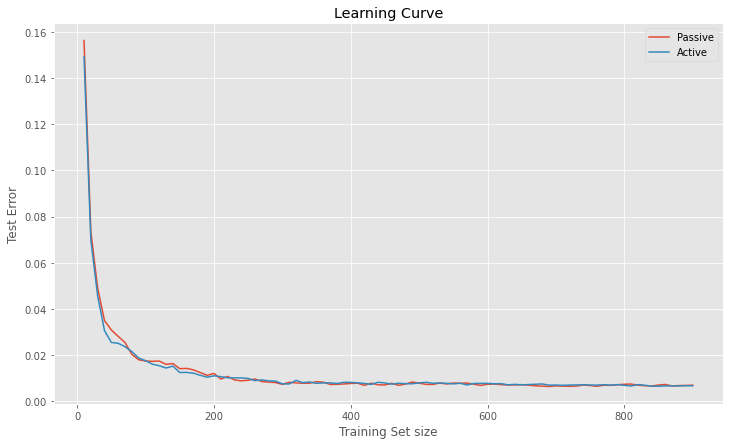

In [39]:
x = 10 * np.arange(1, 91)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(x, 1 - passive_learning_curve, label='Passive')
axes.plot(x, 1 - active_learning_curve, label='Active')
axes.set_xlabel("Training Set size")
axes.set_ylabel("Test Error")
axes.legend()
axes.set_title("Learning Curve")
plt.show()